<a href="https://colab.research.google.com/github/geoffwoollard/learn_cryoem_math/blob/master/nb/abtem_issue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal: Simulate particles of proteins with abtem

# Resources
https://abtem.readthedocs.io/en/latest/walkthrough/introduction.html



# Setup

In [ ]:
import numpy as np
from ase.io import read, proteindatabank
from abtem.plot import show_atoms
from abtem.potentials import Potential

In [ ]:
%%bash
pip install abtem

## Visualize protein atoms from pdb file

In [ ]:
from ase.io import read, proteindatabank


In [ ]:
%%bash
wget https://files.rcsb.org/download/1N4K.pdb # IP3R Mitsu's 2002 IP3 bound structure


--2020-08-04 17:33:07--  https://files.rcsb.org/download/1N4K.pdb
Resolving files.rcsb.org (files.rcsb.org)... 128.6.244.94
Connecting to files.rcsb.org (files.rcsb.org)|128.6.244.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘1N4K.pdb’

     0K .......... .......... .......... .......... ..........  301K
    50K .......... .......... .......... .......... ..........  603K
   100K .......... .......... .......... .......... ..........  596K
   150K .......... .......... .......... .......... ..........  114M
   200K .......... .......... .......... ........               109M=0.3s

2020-08-04 17:33:08 (715 KB/s) - ‘1N4K.pdb’ saved [244377]



In [ ]:
atoms = proteindatabank.read_proteindatabank('1N4K.pdb')


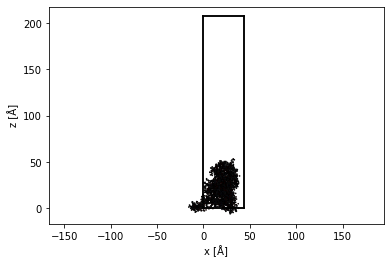

In [ ]:
show_atoms(atoms, plane='xz')

## Calculate potential

### IAM 
Independent atom model

In [ ]:
from abtem.potentials import Potential

In [ ]:
%%bash
rm /usr/local/lib/python3.6/dist-packages/data/*txt
rm lobato* kirkland*

for STR in lobato kirkland;
do
  wget https://raw.githubusercontent.com/jacobjma/abTEM/661238b8da6e59df8e9dd17cdbe20503b3e7aabc/data/$STR.txt
  mkdir -p /usr/local/lib/python3.6/dist-packages/data/
  mv ${STR}.txt /usr/local/lib/python3.6/dist-packages/data/$STR.txt
done



rm: cannot remove '/usr/local/lib/python3.6/dist-packages/data/*txt': No such file or directory
rm: cannot remove 'lobato*': No such file or directory
rm: cannot remove 'kirkland*': No such file or directory
--2020-08-04 17:35:33--  https://raw.githubusercontent.com/jacobjma/abTEM/661238b8da6e59df8e9dd17cdbe20503b3e7aabc/data/lobato.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21338 (21K) [text/plain]
Saving to: ‘lobato.txt’

     0K .......... ..........                                 100% 5.67M=0.004s

2020-08-04 17:35:34 (5.67 MB/s) - ‘lobato.txt’ saved [21338/21338]

--2020-08-04 17:35:34--  https://raw.githubusercontent.com/jacobjma/abTEM/661238b8da6e59df8e9dd17cdbe20503b3e7aabc/data/kirkland.txt
Resolving raw.githubusercontent.com (raw.githubusercon

## Calculate potential (cont)

In [ ]:
potential = Potential(atoms, 
                      sampling=1, # .03
                      parametrization='lobato')


In [ ]:
potential.slice_thickness

0.5

In [ ]:
potential.grid_spacing

In [ ]:
%%time
precalculated_potential = potential.build(pbar=True)


CPU times: user 2.41 s, sys: 85.4 ms, total: 2.5 s
Wall time: 2.1 s


In [ ]:
precalculated_potential.array.shape

(415, 45, 91)

In [ ]:
np.save('1n4k',precalculated_potential.array)

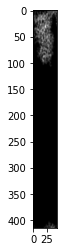

In [ ]:
import matplotlib.pyplot as plt

image = precalculated_potential.array.mean(axis=2)
plt.imshow(image,cmap='gray')

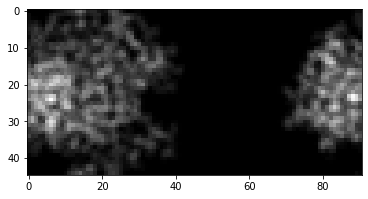

In [ ]:
image = precalculated_potential.array.mean(axis=0)
plt.imshow(image,cmap='gray')

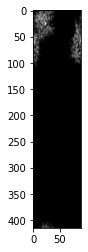

In [ ]:
image = precalculated_potential.array.mean(axis=1)
plt.imshow(image,cmap='gray')

# Wave functions

In [ ]:
from abtem.potentials import ArrayPotential
from abtem.waves import PlaneWave
#wave = PlaneWave(energy=300e3)


In [ ]:
wave = PlaneWave(energy=300e3)

wave.grid.match(potential)

wave = wave.build()

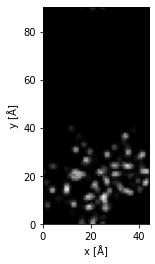

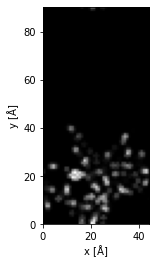

In [ ]:
for i in range(8,10): potential[i].show()

In [ ]:
from abtem.waves import FresnelPropagator, transmit

potential_slice = potential[7]
propagator = FresnelPropagator()

transmit(wave, potential_slice)
propagator.propagate(wave, potential_slice.thickness)

wave.show()

TypeError: ignored

In [ ]:
potential_slice.thickness

0.49907710843373493

In [ ]:
for potential_slice in potential:
    transmit(wave, potential_slice)
    propagator.propagate(wave, potential_slice.thickness)

TypeError: ignored

In [ ]:
exit_wave = PlaneWave(energy=300e3,sampling=1).multislice(potential)


TypeError: ignored